<a href="https://colab.research.google.com/github/SwastikGorai/Bigram/blob/master/Bigram_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
names = open('names .txt','r').read().splitlines()

In [5]:
names[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [6]:
minn = min(len(w) for w in names)
maxx = max(len(w) for w in names)
print(f'Min and max len of names : {minn} and {maxx}')

Min and max len of names : 2 and 15


In [7]:
bigram_set = {}
for i in names:
  # print(i)
  x = ['<S>'] + list(i) + ['<E>']
  for y,z in zip(x, x[1:]):
    bigram = (y,z)
    bigram_set[bigram] = bigram_set.get(bigram, 0) + 1


In [8]:
bigram_set

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [9]:
chars = sorted(list(set(''.join(names))))
# chars
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
NxN = len(itos)
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [10]:
bigram_set_matrix = np.zeros((NxN,NxN), dtype = int)

In [11]:
for w in names:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    i1 = stoi[ch1]
    i2 = stoi[ch2]
    bigram_set_matrix[i1, i2] += 1
bigram_set_matrix = tf.Variable(bigram_set_matrix, dtype = tf.int32)

In [12]:
bigram_set_matrix[20][21]

<tf.Tensor: shape=(), dtype=int32, numpy=78>

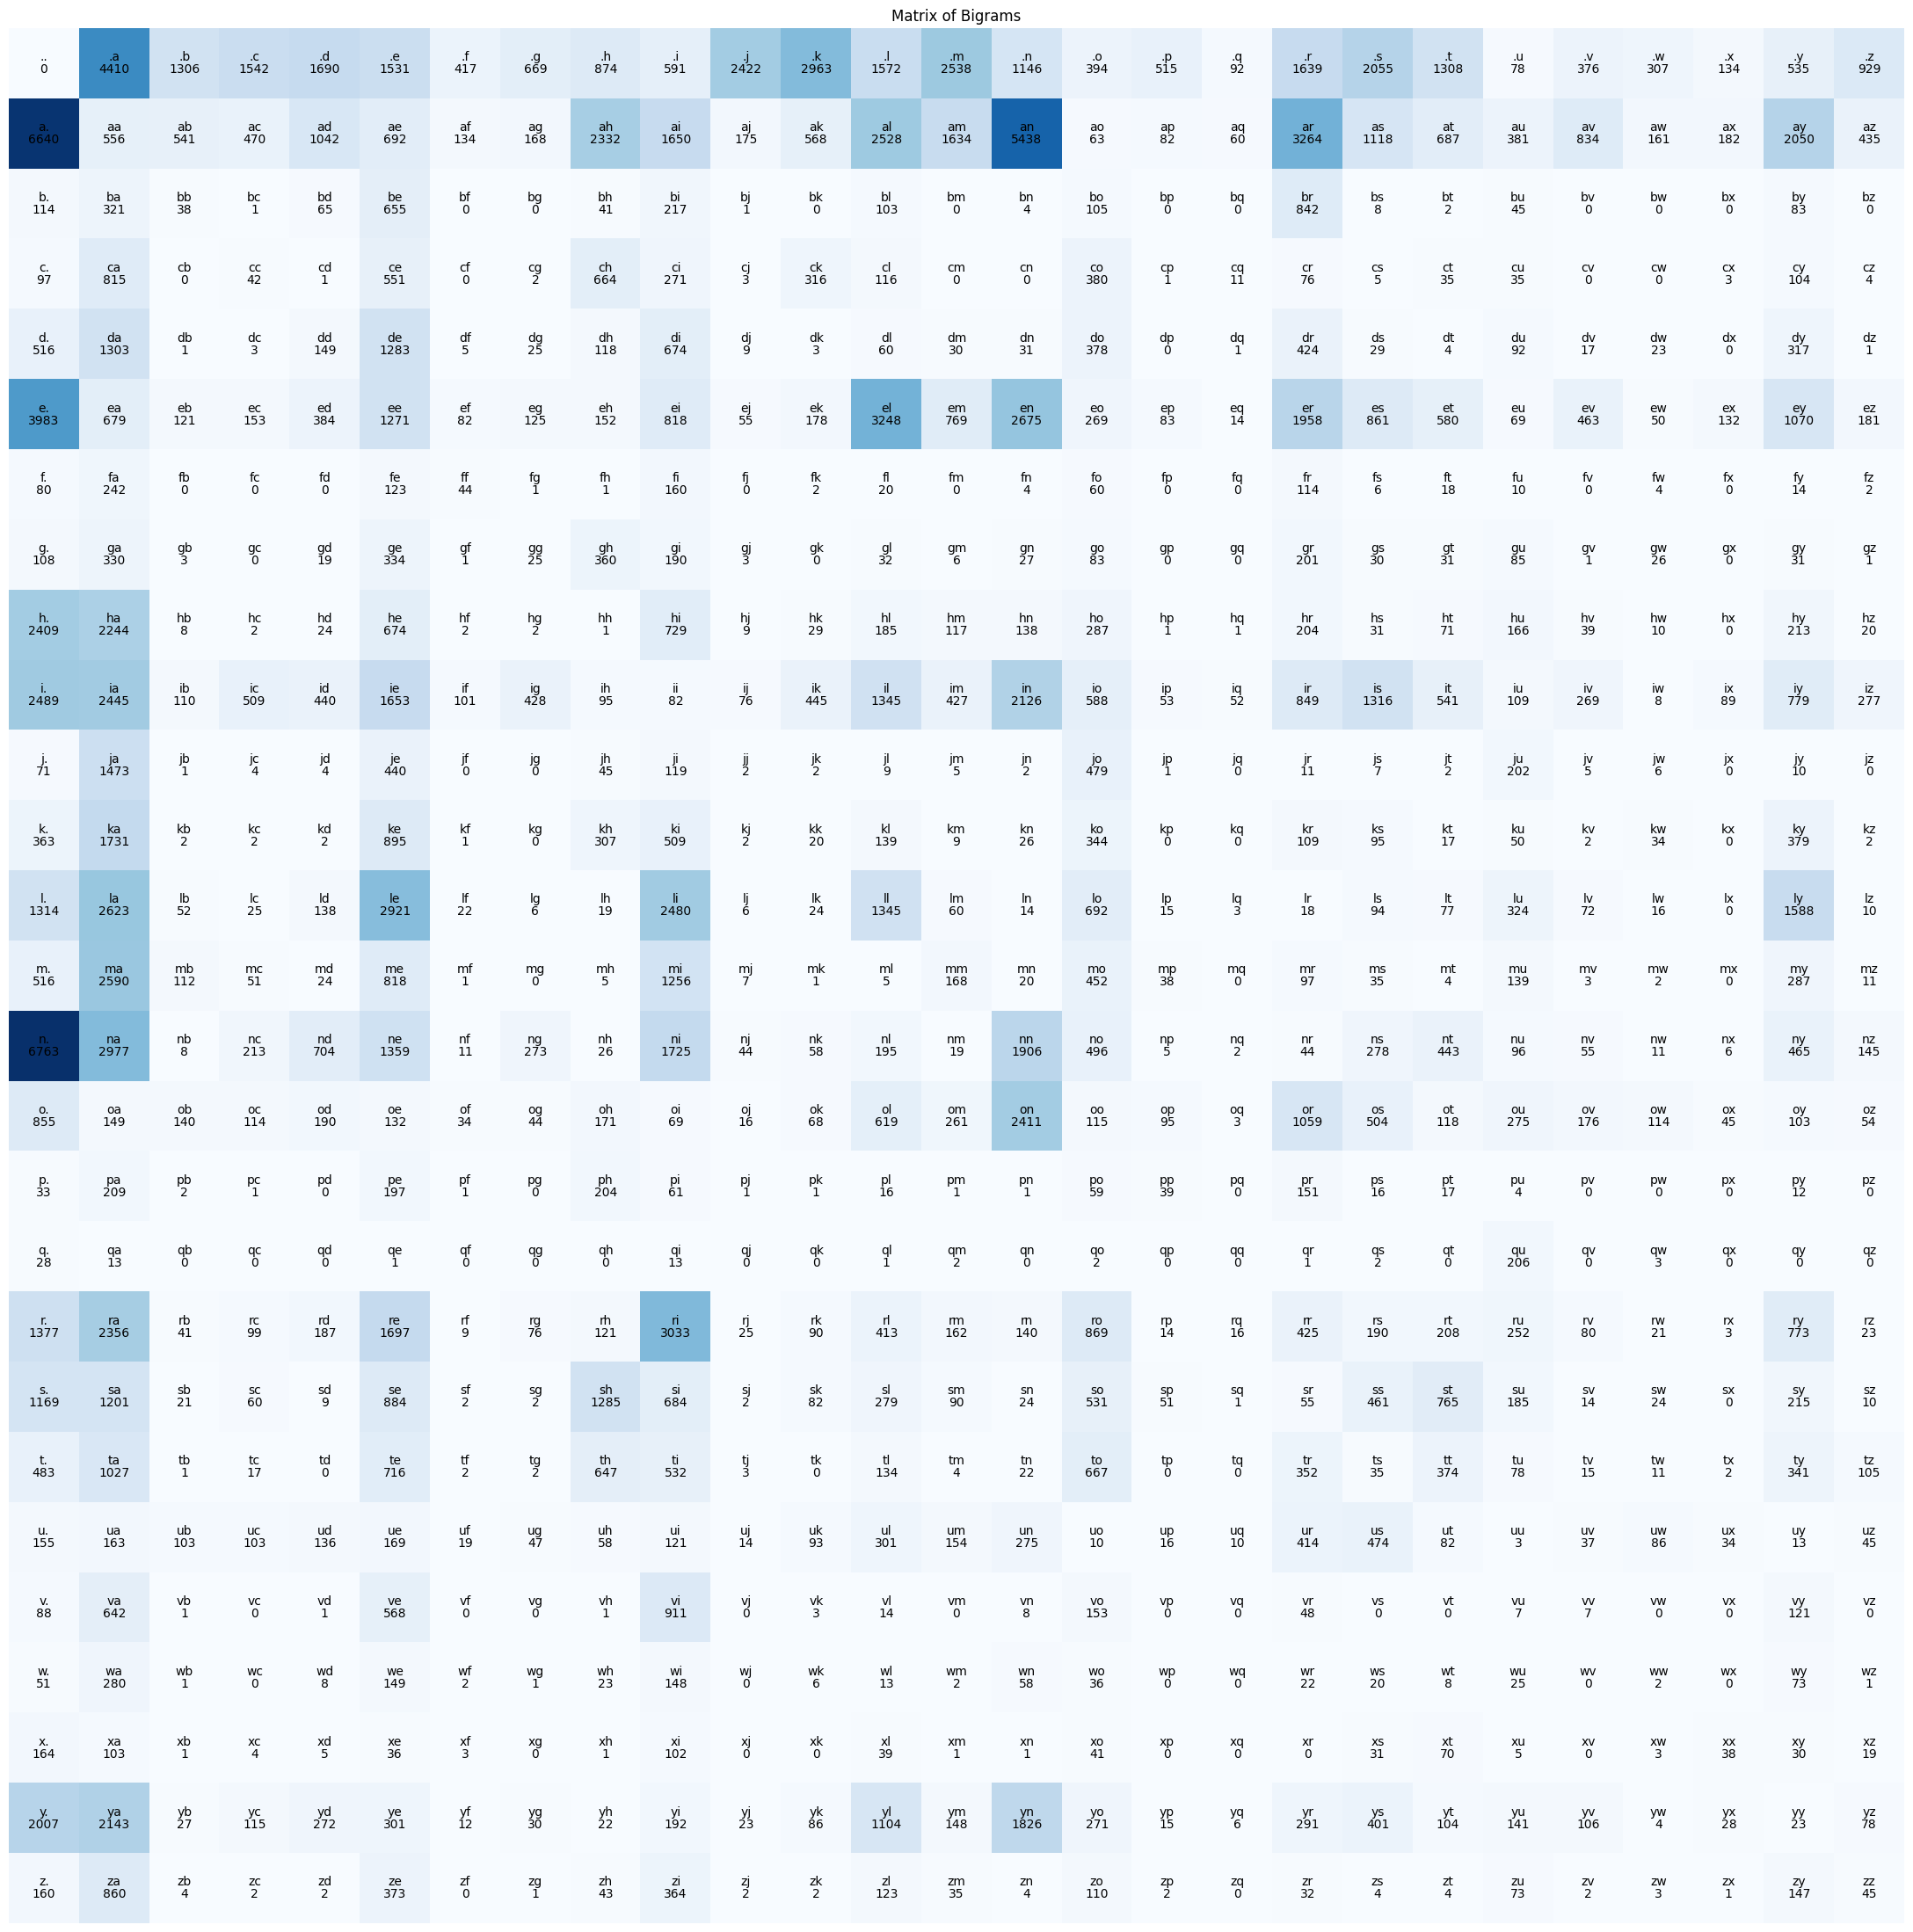

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
def plotMxM(NxN, itos, bigram_set_matrix ):
  plt.figure(figsize=(28,28))
  plt.imshow(bigram_set_matrix, cmap='Blues')
  for i in range(NxN):
      for j in range(NxN):
          chstr = itos[i] + itos[j]
          plt.text(j, i, chstr, ha="center", va="bottom", color='black')
          plt.text(j, i, int(bigram_set_matrix[i, j]), ha="center", va="top", color='black')
  # plt.patch.set_edgecolor('black')
  # plt.patch.set_linewidth(1)
  plt.axis('off');
  plt.title('Matrix of Bigrams')



plotMxM(NxN, itos, bigram_set_matrix)

In [14]:
bigram_set_matrix[0]

<tf.Tensor: shape=(27,), dtype=int32, numpy=
array([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422,
       2963, 1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,
        376,  307,  134,  535,  929], dtype=int32)>

In [15]:
#Normalising and adding smoothening(+1 to all cells)


bigram_set_matrix = tf.add(bigram_set_matrix, 1)


In [16]:
bigram_set_matrix.shape

TensorShape([27, 27])

In [17]:
bigram_set_matrix = tf.cast(bigram_set_matrix, dtype = tf.float32)

In [18]:
summ = tf.reduce_sum(bigram_set_matrix, axis = 1, keepdims=True)  # Req is [56,1]
summ.shape
summ

<tf.Tensor: shape=(27, 1), dtype=float32, numpy=
array([[32060.],
       [33912.],
       [ 2672.],
       [ 3559.],
       [ 5523.],
       [20450.],
       [  932.],
       [ 1954.],
       [ 7643.],
       [17728.],
       [ 2927.],
       [ 5067.],
       [13985.],
       [ 6669.],
       [18354.],
       [ 7961.],
       [ 1053.],
       [  299.],
       [12727.],
       [ 8133.],
       [ 5597.],
       [ 3162.],
       [ 2600.],
       [  956.],
       [  724.],
       [ 9803.],
       [ 2425.]], dtype=float32)>

In [19]:
ProbDiv = bigram_set_matrix / summ
ProbTFDiv = tf.divide(bigram_set_matrix, summ)

In [20]:
print(ProbDiv.shape)
tf.reduce_sum(ProbDiv[0])


(27, 27)


<tf.Tensor: shape=(), dtype=float32, numpy=0.99999994>

In [21]:
print(ProbTFDiv.shape)
tf.reduce_sum(ProbTFDiv[0]) # Should be 1

(27, 27)


<tf.Tensor: shape=(), dtype=float32, numpy=0.99999994>

In [22]:
ProbTFDiv[0]

<tf.Tensor: shape=(27,), dtype=float32, numpy=
array([3.1191517e-05, 1.3758577e-01, 4.0767312e-02, 4.8128508e-02,
       5.2744854e-02, 4.7785401e-02, 1.3038054e-02, 2.0898316e-02,
       2.7292576e-02, 1.8465377e-02, 7.5577043e-02, 9.2451654e-02,
       4.9064256e-02, 7.9195261e-02, 3.5776667e-02, 1.2320649e-02,
       1.6094822e-02, 2.9008109e-03, 5.1154085e-02, 6.4129755e-02,
       4.0829696e-02, 2.4641298e-03, 1.1759201e-02, 9.6069872e-03,
       4.2108544e-03, 1.6718652e-02, 2.9008109e-02], dtype=float32)>

In [23]:
tf.random.set_seed(2147483647)
g = tf.random.Generator.from_seed(2147483647)
for i in range(5):
  out = []
  ix = 0
  while True:
    p = ProbTFDiv[ix]
    # print(p)
    # ix = tf.random.categorical(p[tf.newaxis], num_samples = 1, dtype = tf.int32 ).numpy()[0][0]
    num_samples=1
    replacement=True
    p_tf = tf.constant(p, dtype=tf.float32)
    ix = tf.random.categorical(tf.math.log([p_tf]), num_samples=num_samples)
    ix = tf.squeeze(ix).numpy()
    #__
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

aria.
atze.
anain.
n.
ssodaysiexyamon.


In [24]:
# GOAL:
# maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood
# less is better
# log(a*b*c) = log(a) + log(b) + log(c)


log_likelihood = 0.0
n = 0

for w in names:

   chs = ['.'] + list(w) + ['.']
   for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = ProbTFDiv[ix1, ix2]
    logprob = tf.math.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
# Negative Log Likelihood
nll = -log_likelihood
print(f'Negative log likelihood :{nll=}')
print(f'Average negative log likelihood: {nll/n}')

log_likelihood=<tf.Tensor: shape=(), dtype=float32, numpy=-559951.56>
Negative log likelihood :nll=<tf.Tensor: shape=(), dtype=float32, numpy=559951.56>
Average negative log likelihood: 2.4543561935424805


In [25]:
# Just visualising
xs, ys = [], []

for w in names[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

print(xs)
print(ys)

. e
e m
m m
m a
a .
[0, 5, 13, 13, 1]
[5, 13, 13, 1, 0]


In [26]:
Encoded = tf.one_hot(xs, dtype = tf.float32, depth = len(itos) )
Encoded

<tf.Tensor: shape=(5, 27), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [27]:
Encoded.shape

TensorShape([5, 27])

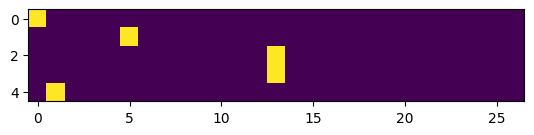

In [28]:
plt.imshow(Encoded)

In [53]:
weight_matrix = tf.random.normal((27,27)) # 27 rows, 27 column
print(weight_matrix)
logits = Encoded @ weight_matrix
print(logits)

tf.Tensor(
[[ 1.63877606e+00  7.05878496e-01 -2.53191590e+00  2.11581635e+00
   2.10420817e-01  1.31703842e+00  9.57317710e-01  6.70656040e-02
  -1.40251875e+00 -3.16387445e-01  3.43542576e-01 -3.79205674e-01
   5.14360964e-01  5.11737823e-01  4.19030994e-01  8.29860345e-02
  -7.38373473e-02 -3.86730909e-01  9.14138913e-01 -1.27999723e+00
  -9.99657154e-01  4.55510676e-01 -9.55085695e-01 -4.36876744e-01
  -5.91317832e-01  1.14509547e+00 -2.63884723e-01]
 [-3.76465559e-01 -1.42850482e+00  1.08370793e+00  2.61729002e-01
   1.33742377e-01 -1.27484071e+00  5.50721139e-02 -4.01832223e-01
   7.42731273e-01 -1.02065317e-01 -3.23526889e-01 -1.56290722e+00
   1.10768223e+00 -1.16298401e+00 -3.14099818e-01 -3.14901781e+00
   6.71434402e-01  1.38764048e+00  3.22683871e-01  2.59660929e-01
   1.05250108e+00 -5.79517305e-01  5.43375492e-01  1.04117155e+00
  -8.48776817e-01  2.54930675e-01 -2.09504771e+00]
 [ 8.61496270e-01  1.92096639e+00 -6.52258873e-01  8.72122705e-01
  -3.53115678e-01  9.30816531

In [54]:
# Log-scale counts to counts by using exponentiation
count = tf.exp(logits)
print(count)


tf.Tensor(
[[ 5.148864    2.0256252   0.07950655  8.296355    1.2341973   3.7323513
   2.6047006   1.0693656   0.24597663  0.72877705  1.4099336   0.68440485
   1.6725694   1.6681877   1.5204875   1.0865266   0.92882276  0.67927384
   2.4946263   0.27803808  0.3680056   1.5769784   0.38477919  0.6460511
   0.5535973   3.1427414   0.76806206]
 [ 1.0288024   1.2754818   2.295337    0.8297477   0.5367107   0.31061944
   1.2650735   5.9045515   0.7310666   1.7304888   1.9035782   0.45518243
   0.82245535  3.351192    0.15554816  0.9168036   0.42250332  0.40435326
   0.86451536  0.43759006  0.40833232  6.930866    0.7433913   0.5598892
   2.1730957   1.435396    0.42799443]
 [ 0.20195416  0.5418333   1.8913556   1.2308781   0.19595799  0.9662767
   1.2648832   0.30738446  1.5665011   0.6824671   1.4831245   0.8897396
   0.5827548   3.6711524   1.2636086   1.659996    0.16918491  1.4242474
   0.33731395  4.0525265  17.511065    0.6711811   1.4657066   0.17560491
   4.0713687   0.2752127   1.

In [55]:
# calculating the sum of elements along the second dimension (axis 1) of the tensor for normalisation:
count_sum = tf.reduce_sum(count, axis=1, keepdims=True)
print(count_sum)

tf.Tensor(
[[45.028805]
 [38.320564]
 [49.83923 ]
 [49.83923 ]
 [34.840454]], shape=(5, 1), dtype=float32)


In [57]:
probablity_dist = count/count_sum
probablity_dist

<tf.Tensor: shape=(5, 27), dtype=float32, numpy=
array([[0.11434601, 0.0449851 , 0.00176568, 0.18424551, 0.02740906,
        0.08288808, 0.05784521, 0.02374848, 0.00546265, 0.01618469,
        0.03131181, 0.01519927, 0.03714443, 0.03704713, 0.033767  ,
        0.02412959, 0.0206273 , 0.01508532, 0.05540068, 0.00617467,
        0.00817267, 0.03502155, 0.00854518, 0.01434751, 0.01229429,
        0.06979402, 0.01705713],
       [0.02684727, 0.03328453, 0.05989831, 0.0216528 , 0.01400581,
        0.00810582, 0.03301292, 0.1540831 , 0.01907766, 0.04515823,
        0.04967511, 0.01187828, 0.02146251, 0.08745153, 0.00405913,
        0.02392459, 0.0110255 , 0.01055186, 0.02256009, 0.0114192 ,
        0.0106557 , 0.18086544, 0.01939928, 0.01461067, 0.05670834,
        0.03745759, 0.01116879],
       [0.00405211, 0.01087162, 0.03794913, 0.02469697, 0.0039318 ,
        0.01938787, 0.02537927, 0.00616752, 0.03143109, 0.01369337,
        0.02975817, 0.01785219, 0.01169269, 0.0736599 , 0.02535369,
 

In [60]:
tf.reduce_sum(probablity_dist[0]) # Should be 1

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>